### Packages 

In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns

### Loading Data Usind pandas 

In [126]:
data=pd.read_excel("zomato_train.xlsx")

In [127]:
data.head()

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rates
0,https://www.zomato.com/bangalore/al-swaad-take...,"18, Masjid Street, Opp Akbari Masjid Neelasand...",Al Swaad Take Away,Yes,No,13,+91 7019942388\n+91 9902335220,Richmond Road,Quick Bites,NaN,"North Indian, South Indian, Arabian",350,"[('Rated 1.0', 'RATED\n If U need reasonable ...","['Beef Seekh Kabab', 'Beef BBQ Chops', 'Beef M...",Delivery,Residency Road,3.1
1,https://www.zomato.com/bangalore/the-boozy-gri...,"2nd Floor, 1st A Cross Road, Jyothi Nivas Coll...",The Boozy Griffin,No,Yes,5015,080 33512954,Koramangala 5th Block,"Casual Dining, Pub","Cocktails, Craft Beer, Salads, Devils Chicken,...","European, Continental","1,800","[('Rated 5.0', 'RATED\n Really great ambience...",[],Dine-out,Koramangala 6th Block,4.6
2,https://www.zomato.com/bangalore/barkat-btm-ba...,"28th, 8th Cross, Maruthi Nagar, Madiwala, BTM,...",Barkat,No,No,6,+91 9019670836,BTM,Quick Bites,NaN,Kerala,250,[],[],Dine-out,Koramangala 4th Block,3.4
3,https://www.zomato.com/bangalore/sriracha-lave...,"204, 2nd Level, 4th Floor, Comet Block, UB Cit...",Sriracha,No,No,699,+91 8041755366\n+91 7022422473,Lavelle Road,Casual Dining,"Noodles, Laksa, Cocktails, Dumplings, Sangria,...","Thai, Chinese, Indonesian, Asian, Momos","1,500","[('Rated 3.0', 'RATED\n Another restaurant in...",[],Dine-out,Residency Road,4.3
4,https://www.zomato.com/bangalore/sri-ganesh-ju...,"513, Opposite Ganesh Temple, Koramangala 8th B...",Sri Ganesh Juice Junction,Yes,No,129,+91 9845623889,Koramangala 8th Block,Beverage Shop,NaN,"Juices, Fast Food",150,"[('Rated 4.0', 'RATED\n Good cafe with most v...","['Dry Fruit Milkshake', 'Wheat Grass with Wate...",Delivery,Koramangala 6th Block,3.7


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41373 entries, 0 to 41372
Data columns (total 17 columns):
url                            41373 non-null object
address                        41373 non-null object
name                           41373 non-null object
online_order                   41373 non-null object
book_table                     41373 non-null object
votes                          41373 non-null int64
phone                          40402 non-null object
location                       41358 non-null object
rest_type                      41198 non-null object
dish_liked                     18901 non-null object
cuisines                       41341 non-null object
approx_cost(for two people)    41094 non-null object
reviews_list                   41373 non-null object
menu_item                      41373 non-null object
listed_in(type)                41373 non-null object
listed_in(city)                41373 non-null object
rates                          33392 non-nul

In [129]:
data.describe()

,votes
count,41373.000000
mean,283.771493
std,806.112459
min,0.000000
25%,7.000000
50%,41.000000
75%,200.000000
max,16832.000000


In [130]:
data.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
votes                              0
phone                            971
location                          15
rest_type                        175
dish_liked                     22472
cuisines                          32
approx_cost(for two people)      279
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
rates                           7981
dtype: int64

In [131]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'rates'],
      dtype='object')

In [132]:
data1=data.drop(columns=['url','address','name','phone','location','listed_in(city)','rest_type','cuisines','dish_liked','menu_item'])

In [133]:
data1.head()

,online_order,book_table,votes,approx_cost(for two people),reviews_list,listed_in(type),rates
0,Yes,No,13,350,"[('Rated 1.0', 'RATED\n If U need reasonable ...",Delivery,3.1
1,No,Yes,5015,"1,800","[('Rated 5.0', 'RATED\n Really great ambience...",Dine-out,4.6
2,No,No,6,250,[],Dine-out,3.4
3,No,No,699,"1,500","[('Rated 3.0', 'RATED\n Another restaurant in...",Dine-out,4.3
4,Yes,No,129,150,"[('Rated 4.0', 'RATED\n Good cafe with most v...",Delivery,3.7


### Online Order

In [134]:
data1.online_order.unique()

array(['Yes', 'No'], dtype=object)

In [135]:
data1.online_order.isna().sum()

0

In [136]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [137]:
data2=data1
data2['online_order']=le.fit_transform(data2['online_order'])

In [138]:
data2.head()

,online_order,book_table,votes,approx_cost(for two people),reviews_list,listed_in(type),rates
0,1,No,13,350,"[('Rated 1.0', 'RATED\n If U need reasonable ...",Delivery,3.1
1,0,Yes,5015,"1,800","[('Rated 5.0', 'RATED\n Really great ambience...",Dine-out,4.6
2,0,No,6,250,[],Dine-out,3.4
3,0,No,699,"1,500","[('Rated 3.0', 'RATED\n Another restaurant in...",Dine-out,4.3
4,1,No,129,150,"[('Rated 4.0', 'RATED\n Good cafe with most v...",Delivery,3.7


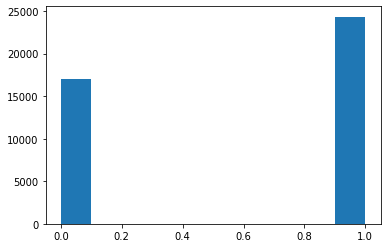

In [139]:
plt.hist(data2.online_order)
plt.show()

### book_table

In [140]:
data3=data2

In [141]:
data3.book_table.unique()

array(['No', 'Yes'], dtype=object)

In [142]:
data2.book_table.isna().sum()

0

In [143]:
data3['book_table']=le.fit_transform(data3['book_table'])

In [144]:
data3.head()

,online_order,book_table,votes,approx_cost(for two people),reviews_list,listed_in(type),rates
0,1,0,13,350,"[('Rated 1.0', 'RATED\n If U need reasonable ...",Delivery,3.1
1,0,1,5015,"1,800","[('Rated 5.0', 'RATED\n Really great ambience...",Dine-out,4.6
2,0,0,6,250,[],Dine-out,3.4
3,0,0,699,"1,500","[('Rated 3.0', 'RATED\n Another restaurant in...",Dine-out,4.3
4,1,0,129,150,"[('Rated 4.0', 'RATED\n Good cafe with most v...",Delivery,3.7


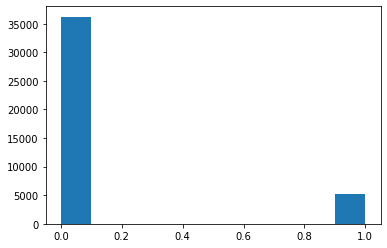

In [145]:
plt.hist(data3.book_table)
plt.show()

### listed_in(type)

In [157]:
data4=data3

In [158]:
data4['listed_in(type)'].unique()

array([2, 4, 5, 3, 1, 6, 0], dtype=int64)

In [159]:
data4['listed_in(type)'].isna().sum()

0

In [160]:
data4['listed_in(type)']=le.fit_transform(data4['listed_in(type)'])

In [161]:
data4.head()

,online_order,book_table,votes,approx_cost(for two people),reviews_list,listed_in(type),rates
0,1,0,13,350,"[('Rated 1.0', 'RATED\n If U need reasonable ...",2,3.1
1,0,1,5015,"1,800","[('Rated 5.0', 'RATED\n Really great ambience...",4,4.6
2,0,0,6,250,[],4,3.4
3,0,0,699,"1,500","[('Rated 3.0', 'RATED\n Another restaurant in...",4,4.3
4,1,0,129,150,"[('Rated 4.0', 'RATED\n Good cafe with most v...",2,3.7


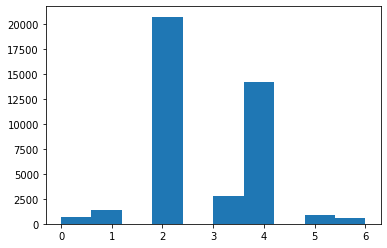

In [162]:
plt.hist(data4['listed_in(type)'])
plt.show()

### votes

In [163]:
data5=data4

In [164]:
data5.votes.isna().sum()

0

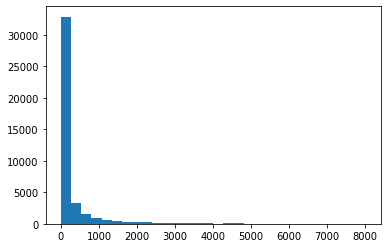

In [165]:
plt.hist(data5.votes,bins=30,range=(0,8000))
plt.show()

### approx_cost(for two people)

In [166]:
data6=data5

In [167]:
data6['approx_cost(for two people)'].isna().sum()

279

In [168]:
data6['approx_cost(for two people)'].value_counts()
#data6['approx_cost(for two people)'].unique()
avg=((300*6046)+(400*5263)+(500*3975)+(200*3871))/(6046+5263+3975+3871)
avg

348.770555990603

In [169]:
data6['approx_cost(for two people)']=data6['approx_cost(for two people)'].fillna(value=avg)

In [185]:
c=[]
for i in data6['approx_cost(for two people)']:
    if type(i)==str:
        c.append(i.replace(',',''))
    else:
        c.append(i)

In [189]:
d=[]
for i in c:
    d.append(float(i))

In [190]:
data6['approx_cost(for two people)']=d
data6.head()

,online_order,book_table,votes,approx_cost(for two people),reviews_list,listed_in(type),rates
0,1,0,13,350.0,"[('Rated 1.0', 'RATED\n If U need reasonable ...",2,3.1
1,0,1,5015,1800.0,"[('Rated 5.0', 'RATED\n Really great ambience...",4,4.6
2,0,0,6,250.0,[],4,3.4
3,0,0,699,1500.0,"[('Rated 3.0', 'RATED\n Another restaurant in...",4,4.3
4,1,0,129,150.0,"[('Rated 4.0', 'RATED\n Good cafe with most v...",2,3.7


### review list

In [191]:
data7=data6
data7.head()

,online_order,book_table,votes,approx_cost(for two people),reviews_list,listed_in(type),rates
0,1,0,13,350.0,"[('Rated 1.0', 'RATED\n If U need reasonable ...",2,3.1
1,0,1,5015,1800.0,"[('Rated 5.0', 'RATED\n Really great ambience...",4,4.6
2,0,0,6,250.0,[],4,3.4
3,0,0,699,1500.0,"[('Rated 3.0', 'RATED\n Another restaurant in...",4,4.3
4,1,0,129,150.0,"[('Rated 4.0', 'RATED\n Good cafe with most v...",2,3.7


In [192]:
d=[]
for i in range(len(data7.reviews_list)):
    x=re.findall("\d\.\d", data7.reviews_list[i])
    c=[]
    total=0
    for i in x:
        if float(i) <= 5:
            c.append(float(i))
        total=total+float(i)
    c=np.array(c)
    d.append(np.mean(c))

C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [193]:
data7['reviews_list']=d

In [194]:
data7.head()

,online_order,book_table,votes,approx_cost(for two people),reviews_list,listed_in(type),rates
0,1,0,13,350.0,2.200000,2,3.1
1,0,1,5015,1800.0,4.300000,4,4.6
2,0,0,6,250.0,NaN,4,3.4
3,0,0,699,1500.0,3.764706,4,4.3
4,1,0,129,150.0,2.250000,2,3.7


In [195]:
data7.reviews_list.isna().sum()

6045

In [196]:
data7.rates.isna().sum()

7981

In [197]:
data7=data7.dropna(subset=['reviews_list'])

In [198]:
data7.rates.isna().sum()

2866

In [199]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35328 entries, 0 to 41372
Data columns (total 7 columns):
online_order                   35328 non-null int32
book_table                     35328 non-null int32
votes                          35328 non-null int64
approx_cost(for two people)    35328 non-null float64
reviews_list                   35328 non-null float64
listed_in(type)                35328 non-null int64
rates                          32462 non-null object
dtypes: float64(2), int32(2), int64(2), object(1)
memory usage: 1.9+ MB


In [200]:
data7=data7.dropna(subset=['rates'])

In [201]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32462 entries, 0 to 41371
Data columns (total 7 columns):
online_order                   32462 non-null int32
book_table                     32462 non-null int32
votes                          32462 non-null int64
approx_cost(for two people)    32462 non-null float64
reviews_list                   32462 non-null float64
listed_in(type)                32462 non-null int64
rates                          32462 non-null object
dtypes: float64(2), int32(2), int64(2), object(1)
memory usage: 1.7+ MB


In [349]:
c=[]
d=[]
for i in data7['rates']:
   c.append(i.replace('-','1.0'))
for i in c:
    d.append(float(i))

AttributeError: 'float' object has no attribute 'replace'

In [214]:
d[1]

4.6

In [215]:
data7['rates']=d

In [216]:
data7.head()

,online_order,book_table,votes,approx_cost(for two people),reviews_list,listed_in(type),rates
0,1,0,13,350.0,2.200000,2,3.1
1,0,1,5015,1800.0,4.300000,4,4.6
3,0,0,699,1500.0,3.764706,4,4.3
4,1,0,129,150.0,2.250000,2,3.7
5,0,0,15,1000.0,2.000000,5,3.0


                      votes       rates  reviews_list
votes         794689.579864  169.812255     77.492654
rates            169.812255    0.198333      0.174344
reviews_list      77.492654    0.174344      0.692123


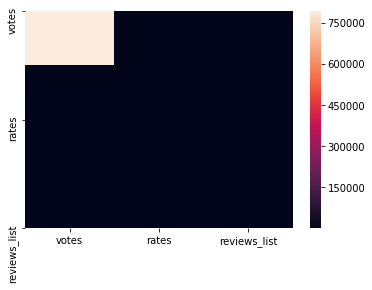

In [355]:
c=data7[['votes','rates','reviews_list']].cov()
print(c)
sns.heatmap(c,)
plt.show()

In [354]:
x=data7[['online_order','book_table','votes','approx_cost(for two people)','reviews_list','listed_in(type)']]

In [291]:
y=data7['rates']

In [292]:
x=np.asmatrix(x)
y=np.asmatrix(y)

In [293]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [294]:
y=y.reshape(-1,1)
y.shape

(32462, 1)

In [295]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [296]:
le=LinearRegression()

In [297]:
le.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [298]:
pred=le.predict(x_test)

In [299]:
mean_squared_error(y_test,pred)

0.11118632615641168

In [300]:
#x=data7[['votes','approx_cost(for two people)','reviews_list']]

In [301]:
from sklearn.tree import DecisionTreeRegressor

In [341]:
de=DecisionTreeRegressor(max_depth=20)

In [342]:
pred=de.fit(x_train,y_train).predict(x_test)

In [343]:
mean_squared_error(y_test,pred)

0.051701851737878377

In [344]:
from sklearn.linear_model import SGDRegressor

In [345]:
sgb=SGDRegressor()

In [346]:
pred=sgb.fit(x_train,y_train).predict(x_test)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [347]:
mean_squared_error(y_test,pred)

2.1004705269020647e+28

In [358]:
from sklearn.preprochessing import scale
sc=scale(data.votes)

array([-0.33590197,  5.86926257, -0.34458573, ..., -0.2962048 ,
       -0.34334519, -0.35202895])